REGRESIÓN LINEAL CON PYTHON

Trabajaremos con un dataset de casas de EEUU recogidos de la pagina kaggel.com y crearemos un modelo para predecir el precio de las casas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Descargamos USA_hoousing.csv de la pagina kaggle.com y lo guardamos en un directorio de nuestro ordenador para poder 
# usarlo ahora(en mi caso en la carpeta del proyecto)
current_directory = os.getcwd()
print(current_directory)

C:\Users\34649\Documents\Machine Learning Data Science


In [3]:
casas = pd.read_csv('USA_Housing.csv')
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

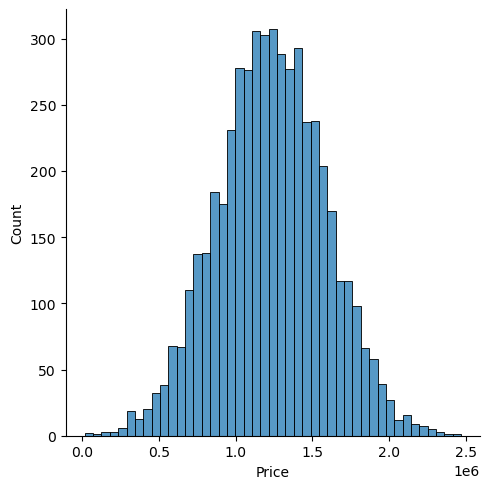

In [14]:
#Podemos ver la distribución del precio de nuesro dataset. Nos hace un gráfico de la distribuciónn del precion segun nuestro dataset
sns.displot(casas['Price'])

<Axes: >

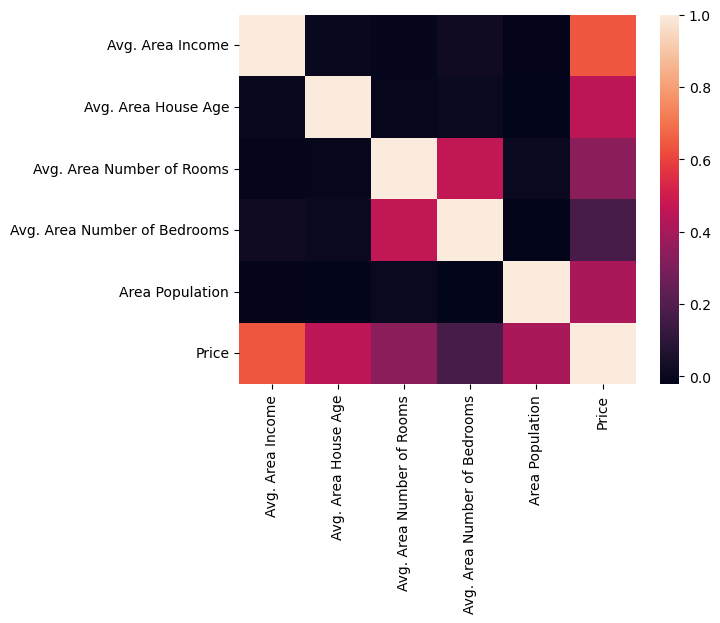

In [17]:
#Podemos hacer un mapa de correlación entre las columnas numéricas de este dataframe
# Primero seleccinamos solo las columnas que sean numéricas y luego hacemos el mapa de calor
numeric_data = casas.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr())

<Axes: >

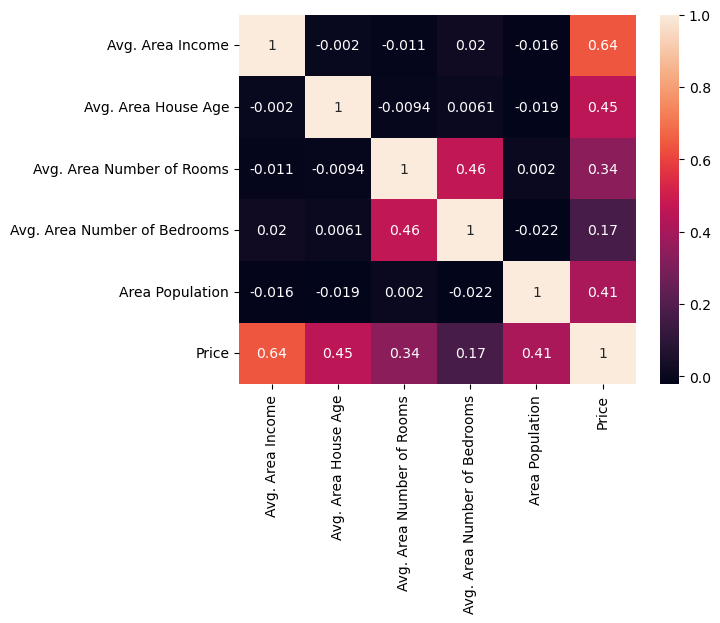

In [18]:
#Para ver los números de correlación
numeric_data = casas.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True)

MACHINE LEARNING: DIVISIÓN DE DATOS Y ENTRENAMIENTO DEL MODELO

In [5]:
# En este ejemplo no vamos a hacer limpieza de datos, así que después de haber obtenido info vamos a pasar a dicidir los datos en 2 partes
# Una parte será para los datos de pruebas y la otra para los datos de entrenamiento
# Importamos los módulos que necesitamos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
casas.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
# Vamos a dividir nuestro dataset segun el precio, ya que es lo que queremos predecir más adelante. Por tanto, el eje 'Y' será el precio
# y el eje 'X' serán el resto de las columnas numéricas (El precio es la variable objetivo)
x= casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [15]:
y= casas['Price']

In [16]:
#Dividimos los datos en datos de entrenamiento y en datos de pruebas:
# 1º Creamos las variables y ahi miso dividimos los datos
#Test_size=0.3 significa que guardaremos el 30% de las muestras para las pruebas y el 70 restante para el entrenamiento
# random_state nos sirve para que tome los datos de forma aleatoria
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
# 2º Entrenamos al modelo mediante el método fit
# Creamos la varibale lrm (lineal regression model)
lrm= LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

EVALUAMOS EL MODELO

In [20]:
# Vamos a evaluar el modelo que hemos creado anteriormente en el modelo de entrenamiento pero lo vamos a probar mediante los datos de pruebas
# Si los datos son correctos y el modelo se verifica que es correcto, pasará a ser un modelo definitivo

In [21]:
from sklearn import metrics

In [22]:
# Creamos la vble predicciones que va a tener las predicciones de los precios de las casas
# Son los valores de las casas según nuestro modelo. El modelo ha sido capaz de pasar las características de las casas y obtener el precio 
# objetivo de cada una de ellas
predicciones =lrm.predict(x_test)

In [23]:
predicciones

array([1308536.13592627, 1237122.72746484, 1243835.62817059, ...,
       1457119.79297249, 1483428.95309395, 1047510.59737165])

In [24]:
#Podemos comparar estos datos con los datos reales
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64

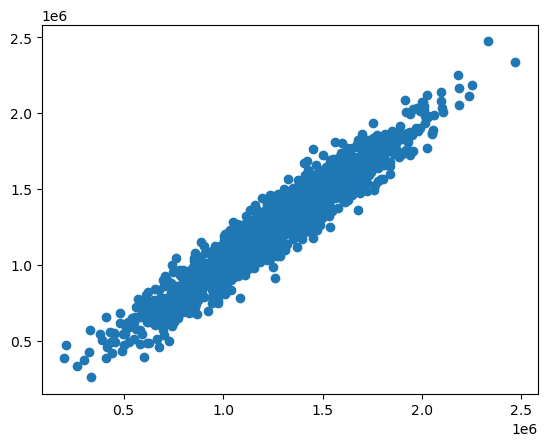

In [26]:
#Para ver más clara esta comparativa vamos a crear un gráfico
plt.scatter(y_test, predicciones)

In [27]:
#Como todos los puntos están muy cerca de la diagonal podemos ver que el modelo es bastante bueno

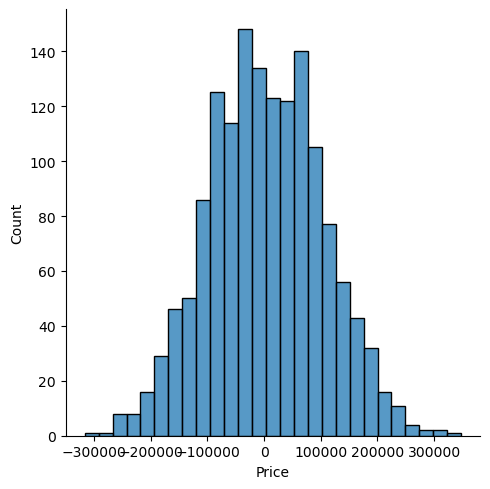

In [28]:
# Tb podemos compararlo mediante un histograma
# Este histograma nos daría el error, ya que estamos quitandole el valor de la predicción al valor real
sns.displot(y_test-predicciones)


In [29]:
# La gráfica que obtenemos es la de un diagrama de distrtibución normal. Si no obtuviésemos un diagrama así tendríamos que replanternos el modelo

In [30]:
# Damos por bueno nuestro modelo, por ello podemos convertirlo en modelo defintivo

In [32]:
# Podemos evaluar de manera numérica nuestro modelo con 3 tipos de métricas. La primera es MAE
# Obtenemos un valor. Cunto menor sea ese valor, mejor es el modelo

In [34]:
metrics.mean_absolute_error(y_test, predicciones)

81135.56609336873

In [35]:
# Métrica MSE
metrics.mean_squared_error(y_test, predicciones)

10068422551.401155

In [36]:
# Métrica RMSE
np.sqrt(metrics.mean_squared_error(y_test, predicciones))

100341.52954485573